AIM: Code the random linear classifier algorithm in Python. 
Tools: 1. Python
2. VScode
3. Numpy
4. Scikit-learn
5. Jupyter Notebook
6. Matplotlib

ALGORITHM: Random Linear Classifier : 1. To find the opyimal straight line 01, 02, theta0, 2. Try K random choices of  01, 02, theta0 , 3. Compute the training error for each of the K hypothesis. 4. Choose the hypothesis with the lowest training error.

In [6]:
#import the numpay and matplotlib
# Numpy - used for scientific computing
# Mateplotlib - used for Plotting
import numpy as np
import matplotlib.pyplot as plt

In [7]:
np.random.seed(0) #for reproducibility

The Gaussian distribution is one of the most important probability distributions in mathematics and statistics.
μ = mean (center of the distribution)
σ = standard deviation (spread of the distribution)
The graph looks like a bell curve.

It is symmetric around the mean 𝜇
About:
68% of values lie within 1σ of the mean
95% of values lie within 2σ
99.7% of values lie within 3σ

In [8]:
# Dogs: higher ear flappiness index , lower whisker leangth
# np.random.normal -- normal distribution or Gaussian distribution -- loc means --  mean  loc(5) == mean = 5 -- we get the data between 6,5,7
dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8, scale=1, size=10)

In [9]:
dogs_whisker_length

array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ])

In [10]:
# Cats: Lower ear flappiness index, Higher whisker length
cats_whisker_length = np.random.normal(loc=8, scale=1, size=10)
cats_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=10)

In [11]:
cats_whisker_length

array([ 5.44701018,  8.6536186 ,  8.8644362 ,  7.25783498, 10.26975462,
        6.54563433,  8.04575852,  7.81281615,  9.53277921,  9.46935877])

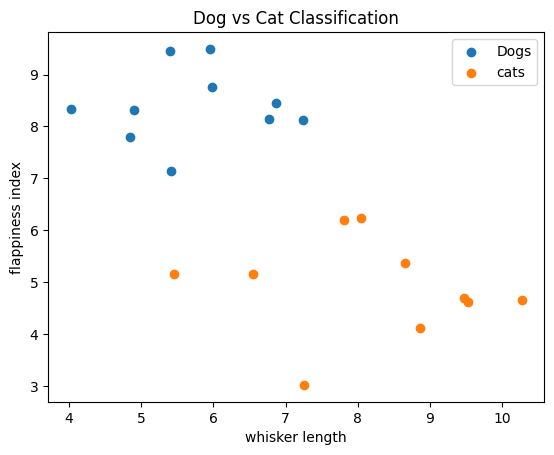

In [12]:
#Plot the graph
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label="Dogs")
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label="cats")
plt.xlabel("whisker length")
plt.ylabel("flappiness index")
plt.title("Dog vs Cat Classification")
plt.legend()
plt.show()

In [14]:
# Implementing Python code to run the alogorithum
# d == 2 , number of features ( whisker length, flappiness index)
 
def random_linear_classifier(data_dogs, data_cats, k , d):
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d) # 01x1 +02x2
        theta0 = np.random.normal() #theta0

        error = compute_error(data_dogs, data_cats, theta, theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0

    return best_theta, best_theta0


In [15]:
def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    # Dogs should be classified positive (>= 0)
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0:
            error += 1
    # Cats should be classified negative (< 0)
    for x_cat in data_cats:
        if np.dot(theta , x_cat) + theta0 > 0: 
            error += 1
    return error

In [16]:
#Prepare data for algorithm
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappiness_index)).T

In [17]:
dogs_data

array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [18]:
cats_data

array([[ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

In [19]:
# RUN Random linear Classifier Algorithm
k = 100  # Number of iterations
d = 2    # Number of features
best_theta,best_theta0 = random_linear_classifier(dogs_data, cats_data,k, d)
print("Best theta:", best_theta)
print("Best theta0:", best_theta0)

Best theta: [-1.07075262  1.05445173]
Best theta0: -0.40317694697317963


In [20]:
best_theta

array([-1.07075262,  1.05445173])

In [21]:
best_theta0

-0.40317694697317963

In [22]:
#Plot the decision boundary
x_vals = np.linspace(2, 10, 100)
y_vals = (-best_theta[0] / best_theta[1]) * x_vals - (best_theta0 / best_theta[1])

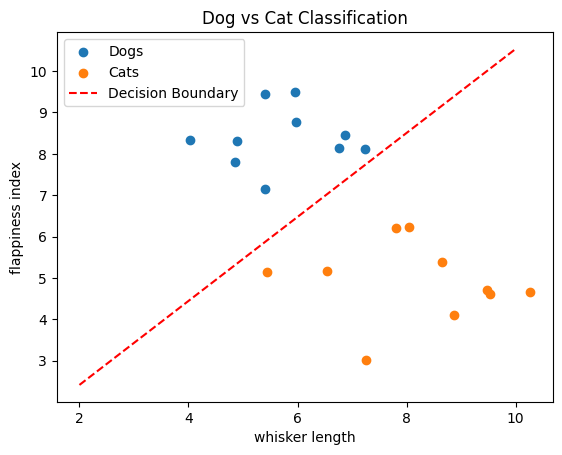

In [23]:
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label="Dogs")
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label="Cats")
plt.plot(x_vals, y_vals, color="red", linestyle="--", label="Decision Boundary")  
plt.xlabel("whisker length")
plt.ylabel("flappiness index")
plt.title("Dog vs Cat Classification")
plt.legend()
plt.show()
